Importing Libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance


Plotting Image

(500, 333, 3)


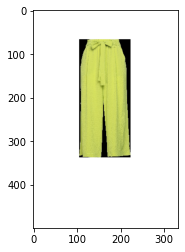

In [2]:
IMG_PATH = "bottoms_resized_png/"
img = cv2.imread(IMG_PATH+"13315564GCR.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
#plt.axis("off")
plt.show()

Exploring Directories

In [3]:
dir_list = os.listdir(IMG_PATH)
#print(dir_list)
arr =np.array(dir_list)

In [4]:
print(arr)

['13079565VVD.png' '13079565VVR.png' '13108390UDD.png' ...
 '35469919KWD.png' '35469919KWR.png' '35469965SND.png']


Extracting Feature Vector of Images Using Pre-trained CNN architectures

In [5]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))

In [6]:
model_new = Model(model.input,model.layers[-2].output)

Encoding into feature vector through below two functions


In [7]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalisation
    img = preprocess_input(img)
    return img

In [8]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [9]:
encode_image("bottoms_resized_png/13315564GCR.png")

array([1.0445322, 0.6135966, 0.       , ..., 0.9857848, 1.6638943,
       0.7575111], dtype=float32)

In [10]:
from time import time
start = time()
encoding_train = {}
#image_id -->feature_vector extracted from Resnet Image
for i in arr:
    #print(i)
    encoding_train[i] = encode_image(IMG_PATH+ i)
            
end_t = time()
print("Total Time Taken :",end_t-start)

Total Time Taken : 376.78329849243164


In [11]:
#print(encoding_train)


In [12]:
!mkdir saved

A subdirectory or file saved already exists.


In [13]:
# Store everything to the disk 
import pickle
with open("saved/encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

Taking any random image as Input image

In [14]:
pant1 = encode_image('bottoms_resized_png/35469154OGD.png')     


Finding the distance using cosine similarity

In [15]:
metric = 'cosine'

In [16]:
for i in encoding_train:
    dc = distance.cdist([pant1], [encoding_train[i]], metric)[0]
    print("the distance between input and the next is {}".format(dc))
     

the distance between input and the next is [0.42297103]
the distance between input and the next is [0.34560459]
the distance between input and the next is [0.43705122]
the distance between input and the next is [0.49135434]
the distance between input and the next is [0.39293258]
the distance between input and the next is [0.38149145]
the distance between input and the next is [0.42985663]
the distance between input and the next is [0.43798832]
the distance between input and the next is [0.31777495]
the distance between input and the next is [0.37151956]
the distance between input and the next is [0.379907]
the distance between input and the next is [0.31868221]
the distance between input and the next is [0.37542652]
the distance between input and the next is [0.3971973]
the distance between input and the next is [0.44942149]
the distance between input and the next is [0.3667441]
the distance between input and the next is [0.3910656]
the distance between input and the next is [0.3261626

the distance between input and the next is [0.25859467]
the distance between input and the next is [0.42908519]
the distance between input and the next is [0.37840514]
the distance between input and the next is [0.3796472]
the distance between input and the next is [0.31864363]
the distance between input and the next is [0.34818407]
the distance between input and the next is [0.43735504]
the distance between input and the next is [0.46872051]
the distance between input and the next is [0.42476957]
the distance between input and the next is [0.44687778]
the distance between input and the next is [0.47584773]
the distance between input and the next is [0.36492884]
the distance between input and the next is [0.51448475]
the distance between input and the next is [0.41402266]
the distance between input and the next is [0.43127849]
the distance between input and the next is [0.31083676]
the distance between input and the next is [0.45564771]
the distance between input and the next is [0.426

In [17]:
cosine_distance = []
for i in arr:
    dc = distance.cdist([pant1], [encoding_train[i]], metric)[0]
    cosine_distance.append([dc, i])
    


In [18]:
#print(cosine_distance)     # list of list

Sorting distances to get the more similar images to the input image in ascending order

In [19]:
cosine_distance.sort()

In [20]:
#print(cosine_distance)

In [21]:
result = []
for dist,idx in cosine_distance:
    result.append(idx)



In [22]:
#print(result)

Displaying Result

35469154OGD.png
35469154OGR.png
35468902SBD.png
35468616KXR.png
13589244AJR.png
35468902SBR.png
35468617DFD.png
35466660NLD.png
35468616KXD.png
35464472VTR.png


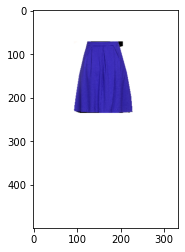

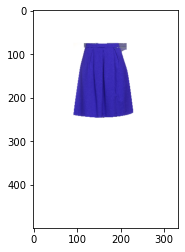

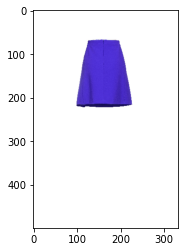

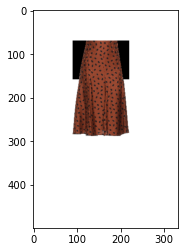

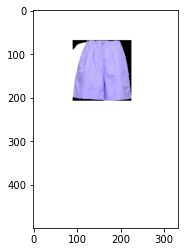

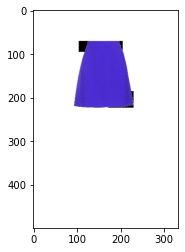

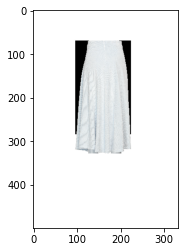

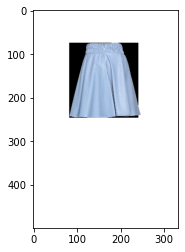

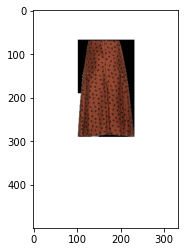

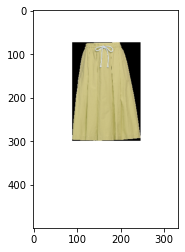

In [24]:
x =0
for idx in result:
    print(idx)
    img = cv2.imread(IMG_PATH + idx)
    plt.figure()
    plt.imshow(img)
    x += 1
    if(x > 9):
        break

Conclusion

1. Tried other similarity metrics as well such as Euclidean and Dot product.
2. Finally submission with Cosine Similarity
